In [1]:
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from IPython import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 1000)

# Loading training data from the CSV

In [3]:
#Importing the dataset
dataset = pd.read_csv('heart.csv')
df = pd.DataFrame(dataset)
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
5     39   M           NAP        120          339          0     Normal   
6     45   F           ATA        130          237          0     Normal   
7     54   M           ATA        110          208          0     Normal   
8     37   M           ASY        140          207          0     Normal   
9     48   F           ATA        120          284          0     Normal   
10    37   F           NAP        130          211          0     Normal   
11    58   M           ATA        136          164          0         ST   
12    39   M           ATA        120          204          0     Normal   
13    49   M           ASY        140          234          0     Normal   
14    42   F           NAP        115          211          0         ST   
15    54   F           ATA        120          273          0     Normal   
16    38   M           ASY        110          196          0     Normal   
17    43   F           ATA        120          201          0     Normal   
18    60   M           ASY        100          248          0     Normal   
19    36   M           ATA        120          267          0     Normal   
20    43   F            TA        100          223          0     Normal   
21    44   M           ATA        120          184          0     Normal   
22    49   F           ATA        124          201          0     Normal   
23    44   M           ATA        150          288          0     Normal   
24    40   M           NAP        130          215          0     Normal   
25    36   M           NAP        130          209          0     Normal   
26    53   M           ASY        124          260          0         ST   
27    52   M           ATA        120          284          0     Normal   
28    53   F           ATA        113          468          0     Normal   
29    51   M           ATA        125          188          0     Normal   
30    53   M           NAP        145          518          0     Normal   
31    56   M           NAP        130          167          0     Normal   
32    54   M           ASY        125          224          0     Normal   
33    41   M           ASY        130          172          0         ST   
34    43   F           ATA        150          186          0     Normal   
35    32   M           ATA        125          254          0     Normal   
36    65   M           ASY        140          306          1     Normal   
37    41   F           ATA        110          250          0         ST   
38    48   F           ATA        120          177          1         ST   
39    48   F           ASY        150          227          0     Normal   
40    54   F           ATA        150          230          0     Normal   
41    54   F           NAP        130          294          0         ST   
42    35   M           ATA        150          264          0     Normal   
43    52   M           NAP        140          259          0         ST   
44    43   M           ASY        120          175          0     Normal   
45    59   M           NAP        130          318          0     Normal   
46    37   M           ASY        120          223          0     Normal   
47    50   M           ATA        140          216          0     Normal   
48    36   M           NAP        112          340          0     Normal   
49    41   M           ASY        110          289          0     Normal   
50    50   M           ASY        130          233          0     Normal   
51    47   F           ASY        120          205   

# Data Preparation - Step 1

#### This data set has 12 columns and there's no columns that can specifically identifying a patient.So no need of removing a column.

In [4]:
#Get features name
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
## Display a description of the DataFrame with summary statistics
print("Describe our DataFrame :\n")
# Prints a summary of numerical columns with statistics such as count, mean, standard deviation, min, and max,
# rounding the results to two decimal places for readability
print(df.describe().round(2))
# Display DataFrame information
print("\nDataframe information:\n")
# Prints information about the DataFrame, including the index, column names, non-null counts, and data types
print(df.info())

Describe our DataFrame :

          Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak  \
count  918.00     918.00       918.00     918.00  918.00   918.00   
mean    53.51     132.40       198.80       0.23  136.81     0.89   
std      9.43      18.51       109.38       0.42   25.46     1.07   
min     28.00       0.00         0.00       0.00   60.00    -2.60   
25%     47.00     120.00       173.25       0.00  120.00     0.00   
50%     54.00     130.00       223.00       0.00  138.00     0.60   
75%     60.00     140.00       267.00       0.00  156.00     1.50   
max     77.00     200.00       603.00       1.00  202.00     6.20   

       HeartDisease  
count        918.00  
mean           0.55  
std            0.50  
min            0.00  
25%            0.00  
50%            1.00  
75%            1.00  
max            1.00  

Dataframe information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non

In [6]:
#Checking the missing value
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

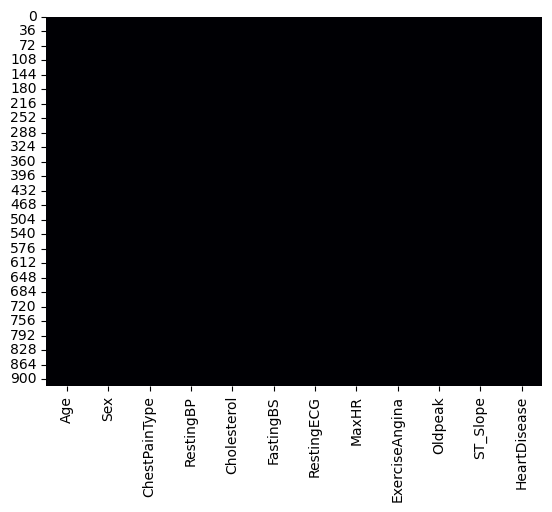

In [7]:
#Visualizing the missing value by seaborn library
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

# Data Cleanup

In [8]:
# Clean and replace invalid entries in the DataFrame
df = df.map(
  lambda x: x if x is np.NaN or not \
    isinstance(x, str) else str(x).strip('_')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
# Get the dimensions of the DataFrame (rows, columns)
df.shape

(918, 12)

In [9]:
# Display the data types of each column in the DataFrame
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# Data Preparation - Step 2 

####  Oldpeak column shouldn't be an Object type as it has all numeric values. Let's convert that column to a Numeric Type

In [10]:
# Convert the 'Oldpeak' column to a numeric data type, handling errors by setting invalid parsing as NaN
df['Oldpeak'] = pd.to_numeric(df['Oldpeak'], errors='coerce').astype('float')

In [11]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Missing Values 

In [12]:
# Calculate the sum of missing values in each column
missing_values_sum = df.isna().sum()

# Calculate the percentage of missing values for each column
total_rows = df.shape[0]
missing_values_percentage = (missing_values_sum / total_rows) * 100

# Get the data type of the column as well
column_datatypes = df.dtypes

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Data Type': column_datatypes,
    'Missing Values': missing_values_sum,
    'Percentage Missing (%)': missing_values_percentage
})

# Display the missing values sum and percentage
print(missing_info)

               Data Type  Missing Values  Percentage Missing (%)
Age                int64               0                     0.0
Sex               object               0                     0.0
ChestPainType     object               0                     0.0
RestingBP          int64               0                     0.0
Cholesterol        int64               0                     0.0
FastingBS          int64               0                     0.0
RestingECG        object               0                     0.0
MaxHR              int64               0                     0.0
ExerciseAngina    object               0                     0.0
Oldpeak          float64               0                     0.0
ST_Slope          object               0                     0.0
HeartDisease       int64               0                     0.0


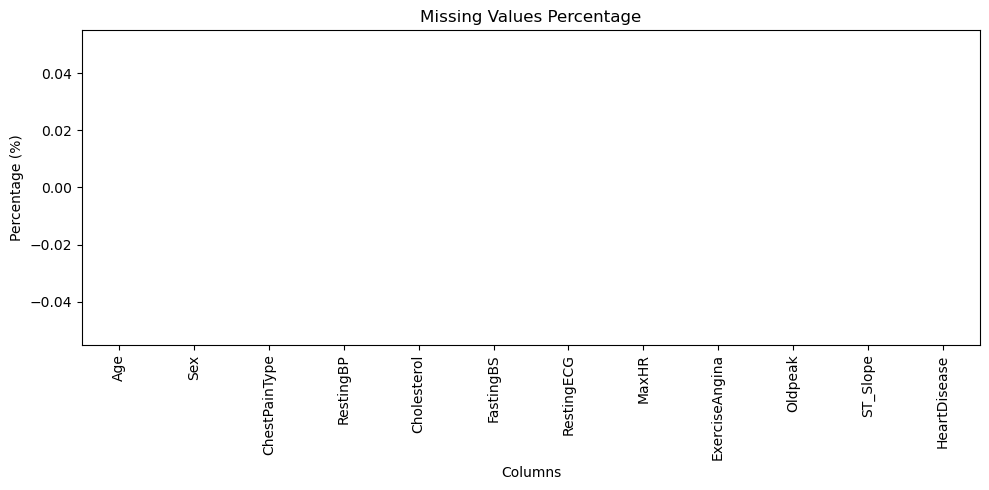

In [13]:
# Create a bar plot for missing values percentage 
plt.figure(figsize=(10, 5))

missing_values_percentage.plot(kind='bar', color='lightcoral')
plt.title('Missing Values Percentage')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')

# Adjust spacing between plots
plt.tight_layout()

# Show the plot
plt.show()

#### According to the above results, no missing values were found in our dataset.

# Categorical Data:  

In [14]:
#Encoding categorical Data
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 2})
df['ChestPainType'] = df['ChestPainType'].replace({'ATA': 1, 'NAP': 2, 'ASY': 3, 'TA': 4})
df['FastingBS'] = df['FastingBS'].replace({0: 1, 1: 2})
df['RestingECG'] = df['RestingECG'].replace({'Normal': 1, 'ST': 2, 'LVH': 3})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N': 1, 'Y': 2})
df['ST_Slope'] = df['ST_Slope'].replace({'Up': 1, 'Flat': 2, 'Down': 3})
df['HeartDisease'] = df['HeartDisease'].replace({1: 1, 0: 2})

In [15]:
#separate categorical data/numerical data
df_num = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
df_cat = df[['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']]

df_num_name = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_cat_name = ['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

In [16]:
#Easier way to separate numerical value and categorical value if we have many features 
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features,'\n')
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease 

Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


# Outliers

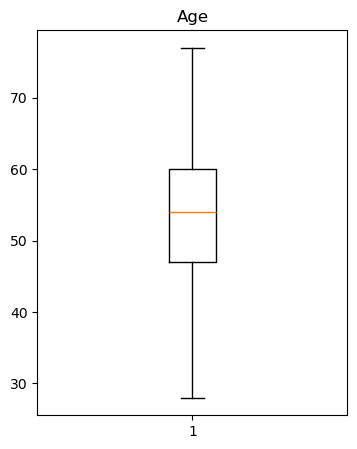

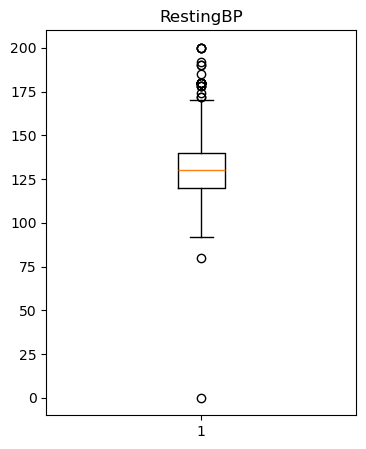

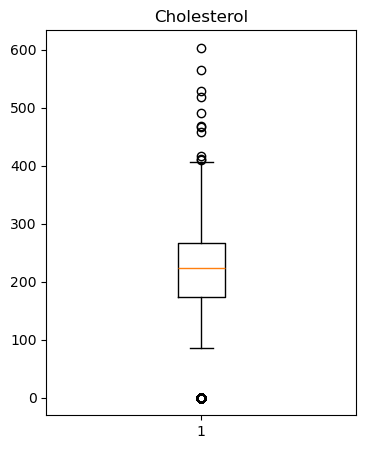

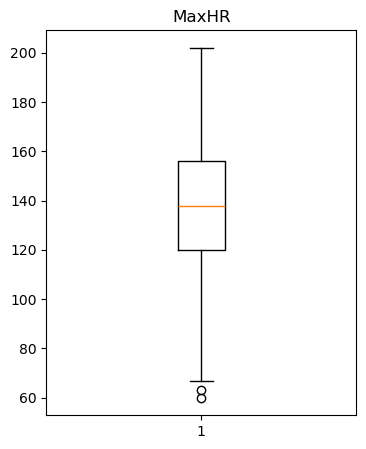

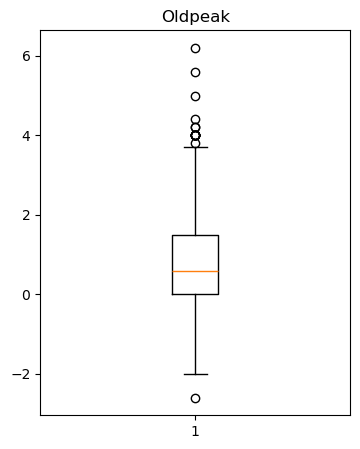

In [17]:
for feature in df_num_name:
    plt.figure(figsize=(4,5))
    plt.boxplot(df[feature])
    plt.title(f'{feature}')
    plt.show()

In [18]:
#Detecting outliers
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [19]:
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    
    print(f"-Check {char} outliers ")

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min())+ '\n')

-Check Age outliers 
number of outliers: 0
max outlier value: nan
min outlier value: nan

-Check RestingBP outliers 
number of outliers: 28
max outlier value: 200
min outlier value: 0

-Check Cholesterol outliers 
number of outliers: 183
max outlier value: 603
min outlier value: 0

-Check MaxHR outliers 
number of outliers: 2
max outlier value: 63
min outlier value: 60

-Check Oldpeak outliers 
number of outliers: 16
max outlier value: 6.2
min outlier value: -2.6



In [20]:
# Define a function to generate a histogram for a specific column
def generate_histogram(data, column_name):
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column_name], bins=20, kde=True)  # Adjust the number of bins as needed
    
    # Customize the y-axis tick labels
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    plt.show()

In [21]:
# Define a function to generate a box plot for a specific column
def generate_boxplot(data, column_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[column_name])
    
    # Customize the y-axis tick labels
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    
    plt.ylabel(column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.show()

# Age Column Data Analysis

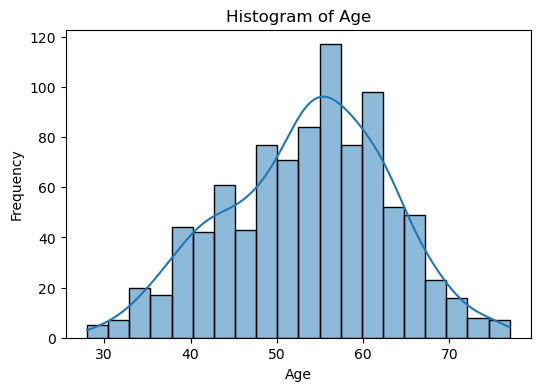

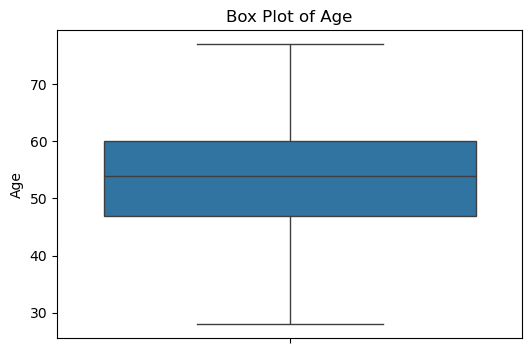

In [22]:
# Generate and display a histogram for the 'Age' column in the DataFrame
generate_histogram(df, 'Age')
# Generate and display a boxplot for the 'Age' column in the DataFrame
generate_boxplot(df, 'Age')

# Cholesterol Column Data Analysis

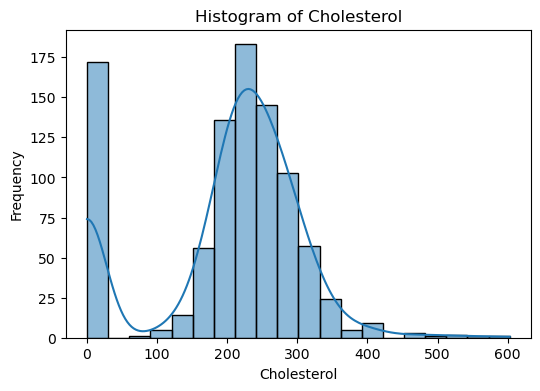

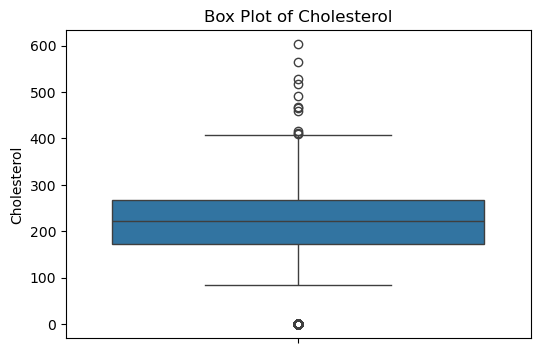

In [23]:
# Generate and display a histogram for the 'Cholesterol' column in the DataFrame
generate_histogram(df, 'Cholesterol')
# Generate and display a boxplot for the 'Cholesterol' column in the DataFrame
generate_boxplot(df, 'Cholesterol')

### As per the above diagram, the Cholesterol column contains data that doesn’t seems to be practical. We must exclude those data considering the optimal Cholesterol level to be 60 to 700 .

In [24]:
# Checking the number of Zeros present in the Cholesterol
print(f" original shape of Cholesterol : {df.Cholesterol.shape}")

ziro_Cholesterol = df[df['Cholesterol'] == 0]
print(f" zero values of Cholesterol : {ziro_Cholesterol.shape}")

non_ziro_Cholesterol = df[df['Cholesterol'] != 0]
print(f" non zero values of Cholesterol : {non_ziro_Cholesterol.shape}")

 original shape of Cholesterol : (918,)
 zero values of Cholesterol : (172, 12)
 non zero values of Cholesterol : (746, 12)


### The cholesterol value cannot be zero. So, zeros must be filled with the median value

In [25]:
## Converting Zero Value of Cholesterol to NaN Value
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan
df.head(5)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140        289.0          1           1   
1   49    2              2        160        180.0          1           1   
2   37    1              1        130        283.0          1           2   
3   48    2              3        138        214.0          1           1   
4   54    1              2        150        195.0          1           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               1      0.0         1             2  
1    156               1      1.0         2             1  
2     98               1      0.0         1             2  
3    108               2      1.5         2             1  
4    122               1      0.0         1             2

In [26]:
## NaN value of Cholesterol is filled with median value
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())
df["Cholesterol"]

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
5      339.0
6      237.0
7      208.0
8      207.0
9      284.0
10     211.0
11     164.0
12     204.0
13     234.0
14     211.0
15     273.0
16     196.0
17     201.0
18     248.0
19     267.0
20     223.0
21     184.0
22     201.0
23     288.0
24     215.0
25     209.0
26     260.0
27     284.0
28     468.0
29     188.0
30     518.0
31     167.0
32     224.0
33     172.0
34     186.0
35     254.0
36     306.0
37     250.0
38     177.0
39     227.0
40     230.0
41     294.0
42     264.0
43     259.0
44     175.0
45     318.0
46     223.0
47     216.0
48     340.0
49     289.0
50     233.0
51     205.0
52     224.0
53     245.0
54     180.0
55     194.0
56     270.0
57     213.0
58     365.0
59     342.0
60     253.0
61     254.0
62     224.0
63     277.0
64     202.0
65     260.0
66     297.0
67     225.0
68     246.0
69     412.0
70     265.0
71     215.0
72     182.0
73     218.0
74     268.0
75     163.0
76     529.0

In [27]:
df = df[(df['Cholesterol'] >= 60) & (df['Cholesterol'] <= 700)]

df.shape

(918, 12)

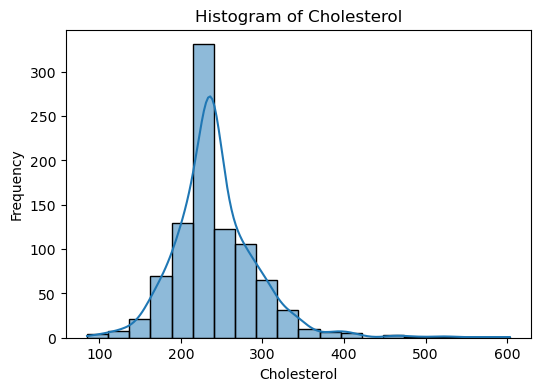

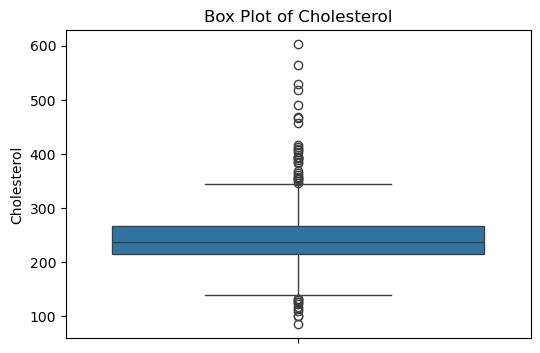

In [28]:
# Regenerate and display a histogram for the 'Cholesterol' column in the DataFrame
generate_histogram(df, 'Cholesterol')
# Regenerate and display a boxplot for the 'Cholesterol' column in the DataFrame
generate_boxplot(df, 'Cholesterol')

# Resting Blood Pressure Column Data Analysis

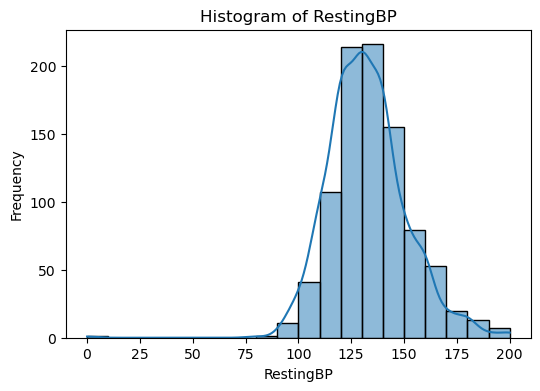

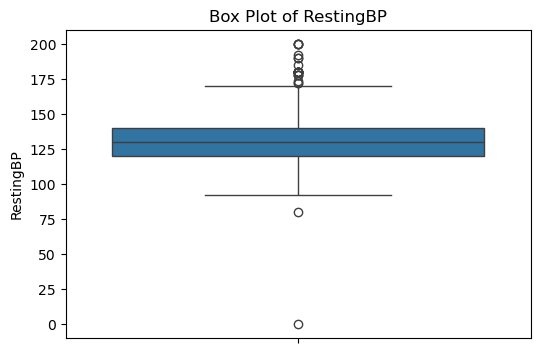

In [29]:
# Regenerate and display a histogram for the 'RestingBP' column in the DataFrame
generate_histogram(df, 'RestingBP')
# Regenerate and display a boxplot for the 'RestingBP' column in the DataFrame
generate_boxplot(df, 'RestingBP')

# Based on the histogram and boxplot, it appears that RestingBP (Resting Blood Pressure) should not contain zero values. Let’s identify and remove any rows where RestingBP is zero, as such values likely represent errors or missing data

In [30]:
#Checking the smallest and largest RestingBP values in dataset
print(f"smallest values :\n{df.RestingBP.nsmallest(3)}")
print(f"largest values :\n{df.RestingBP.nlargest(3)}")

smallest values :
449     0
314    80
227    92
Name: RestingBP, dtype: int64
largest values :
241    200
365    200
399    200
Name: RestingBP, dtype: int64


In [31]:
#Normally Blood Pressure can not be zero value , but in this dataset we have 1 sample
ziro_RestingBP = df[df['RestingBP'] == 0]
ziro_RestingBP

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
449   55    1              2          0        237.0          1           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
449    155               1      1.5         2             1

In [32]:
#We should remove this row 
df = df.drop(df[(df['RestingBP'] == 0)].index) 

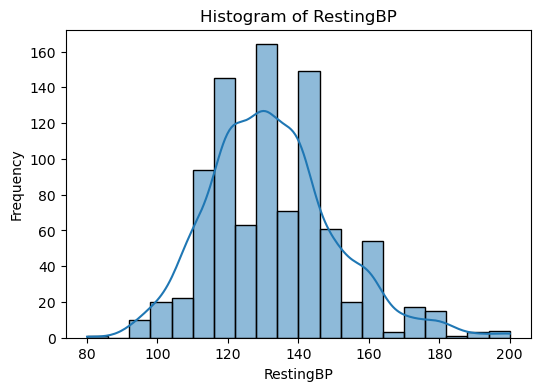

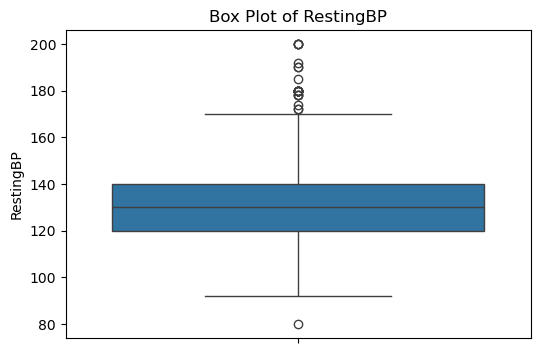

In [33]:
# Regenerate and display histogram and boxplot for the 'RestingBP' column in the DataFrame
generate_histogram(df, 'RestingBP')
generate_boxplot(df, 'RestingBP')

# Oldpeak Column Data Analysis

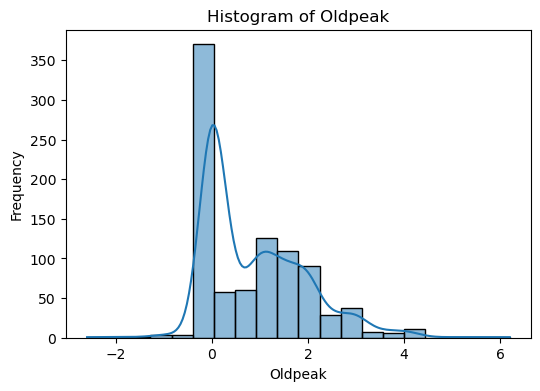

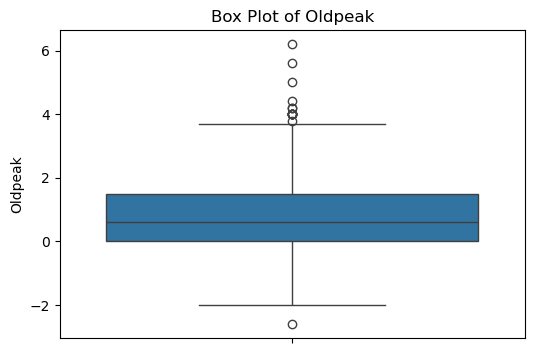

In [34]:
# Generate and display histogram and boxplot for the 'Oldpeak' column in the DataFrame
generate_histogram(df, 'Oldpeak')
generate_boxplot(df, 'Oldpeak')

In [35]:
#Checking the smallest and largest Oldpeak values in dataset
print(f"smallest values :\n{df.Oldpeak.nsmallest(3)}")
print(f"largest values :\n{df.Oldpeak.nlargest(3)}")

smallest values :
324   -2.6
413   -2.0
325   -1.5
Name: Oldpeak, dtype: float64
largest values :
850    6.2
771    5.6
166    5.0
Name: Oldpeak, dtype: float64


In [36]:
#According to the Oldpeak value range we haven`t minus value , but in this dataset we have 13 samples
ziro_Oldpeak = df[df['Oldpeak'] < 0]
ziro_Oldpeak

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
321   63    1              3        100        237.0          2           1   
324   46    1              3        100        237.0          2           2   
325   42    1              3        105        237.0          2           1   
326   45    1              2        110        237.0          1           1   
331   56    1              3        115        237.0          2           2   
332   38    1              2        100        237.0          1           1   
334   51    1              3        130        237.0          2           1   
335   62    1              4        120        237.0          2           3   
352   56    1              3        120        237.0          1           2   
407   62    1              3        115        237.0          2           1   
413   56    1              2        125        237.0          2           1   
421   66    1              2        120        237.0          1           2   
512   35    1              2        123        161.0          1           2   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
321    109               1     -0.9         2             1  
324    133               1     -2.6         2             1  
325    128               2     -1.5         3             1  
326    138               1     -0.1         1             2  
331     82               1     -1.0         1             1  
332    179               1     -1.1         1             2  
334    170               1     -0.7         1             1  
335    134               1     -0.8         2             1  
352    100               2     -1.0         3             1  
407     72               2     -0.5         2             1  
413     98               1     -2.0         2             1  
421    120               1     -0.5         1             2  
512    153               1     -0.1         1             2

In [37]:
#We should remove those rows 
df = df.drop(df[(df['Oldpeak'] < 0)].index)

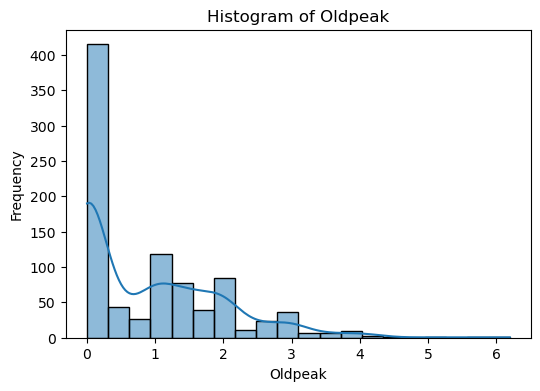

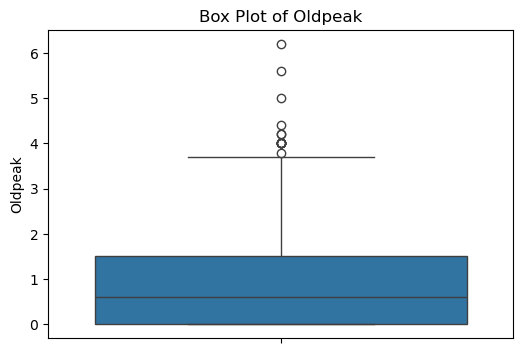

In [38]:
# Regenerate and display histogram and boxplot for the 'Oldpeak' column in the DataFrame
generate_histogram(df, 'Oldpeak')
generate_boxplot(df, 'Oldpeak')

# MaxHR Column Data Analysis

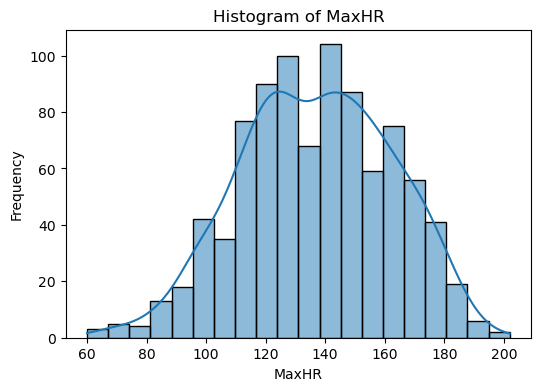

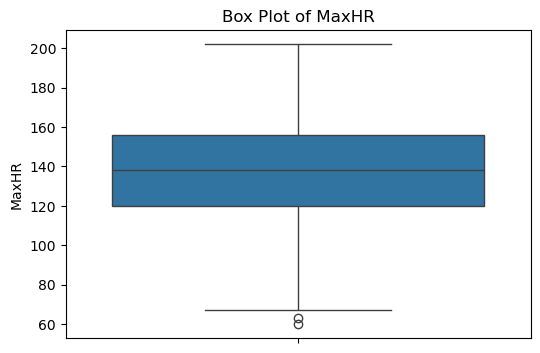

In [39]:
# Generate and display histogram and boxplot for the 'MaxHR' column in the DataFrame
generate_histogram(df, 'MaxHR')
generate_boxplot(df, 'MaxHR')

# Unique and Nununique value:  

In [40]:
#Showing the unique and nununique values
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          66
Cholesterol       221
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            43
ST_Slope            3
HeartDisease        2
dtype: int64

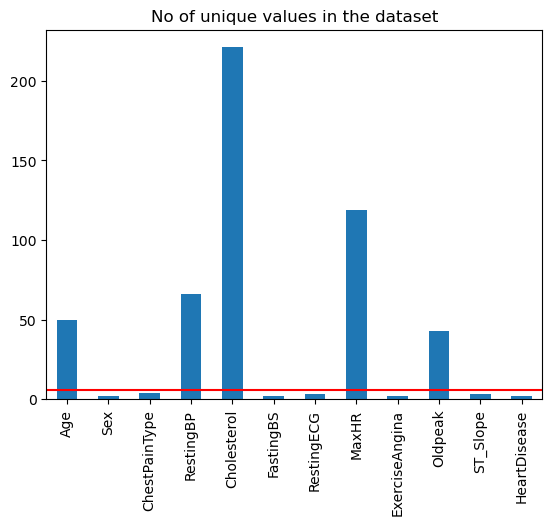

In [41]:
#Below the red horizontal line ,all features are contain categorical data
df.nunique().plot(kind='bar')
plt.title('No of unique values in the dataset')
plt.hlines(y=6, xmin=-2, xmax=15, color='red')
plt.show()

In [42]:
for i in range(0,7):
    print(f"\nShow the unique value of {df_cat_name[i]} column : {pd.unique(df[df_cat_name[i]])}\n")  


Show the unique value of Sex column : [1 2]


Show the unique value of ChestPainType column : [1 2 3 4]


Show the unique value of FastingBS column : [1 2]


Show the unique value of RestingECG column : [1 2 3]


Show the unique value of ExerciseAngina column : [1 2]


Show the unique value of ST_Slope column : [1 2 3]


Show the unique value of HeartDisease column : [2 1]



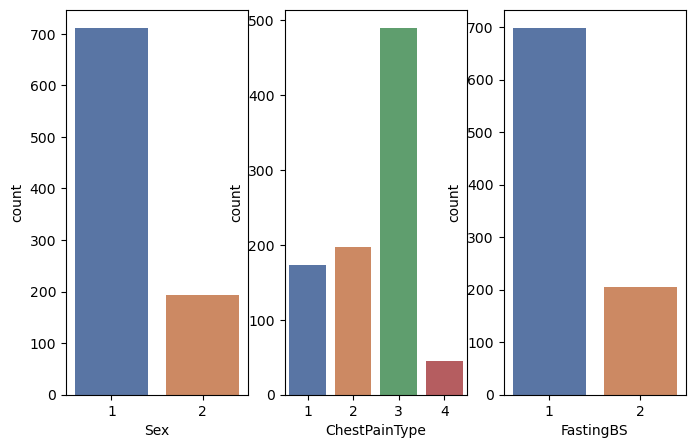

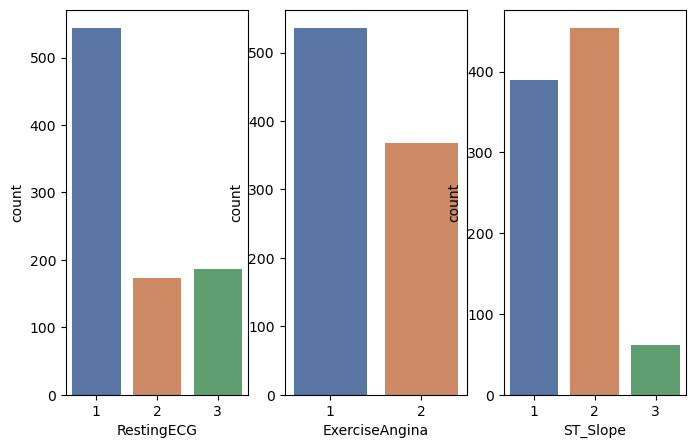

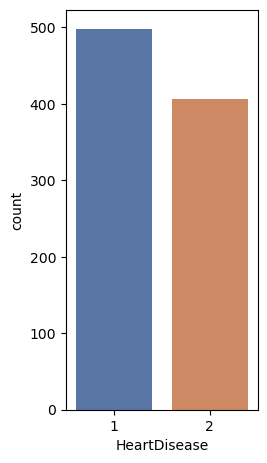

In [43]:
i = 0
while i < 7 :
    if i < 6 :
        plt.figure(figsize=(8,5))
        plt.subplot(1, 3, 1)
        sns.countplot(x=df_cat_name[i] , data=df, hue=df_cat_name[i], palette="deep", legend=False)
        plt.xlabel(str(df_cat_name[i]))
        i+=1

        plt.subplot(1, 3, 2)
        sns.countplot(x=df_cat_name[i] , data=df, hue=df_cat_name[i], palette="deep", legend=False)
        plt.xlabel(str(df_cat_name[i]))
        i+=1
    
        plt.subplot(1, 3, 3)
        sns.countplot(x=df_cat_name[i] , data=df, hue=df_cat_name[i], palette="deep", legend=False)
        plt.xlabel(str(df_cat_name[i]))
        i+=1
    elif i == 6 :
        plt.figure(figsize=(2.4,5))
        plt.subplot(1, 1, 1)
        sns.countplot(x=df_cat_name[i] , data=df, hue=df_cat_name[i], palette="deep", legend=False)
        plt.xlabel(str(df_cat_name[i]))
        i+=1   
        
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
        plt.show()

# Pie Chart

In [44]:
#Count of unique value in each feature
for c in range(6) :
    print(f"\nCount of {df_cat_name[c]} :\n{df[df_cat_name[c]].value_counts()}\n\n------------")


Count of Sex :
Sex
1    711
2    193
Name: count, dtype: int64

------------

Count of ChestPainType :
ChestPainType
3    489
2    197
1    173
4     45
Name: count, dtype: int64

------------

Count of FastingBS :
FastingBS
1    698
2    206
Name: count, dtype: int64

------------

Count of RestingECG :
RestingECG
1    544
3    187
2    173
Name: count, dtype: int64

------------

Count of ExerciseAngina :
ExerciseAngina
1    536
2    368
Name: count, dtype: int64

------------

Count of ST_Slope :
ST_Slope
2    454
1    389
3     61
Name: count, dtype: int64

------------


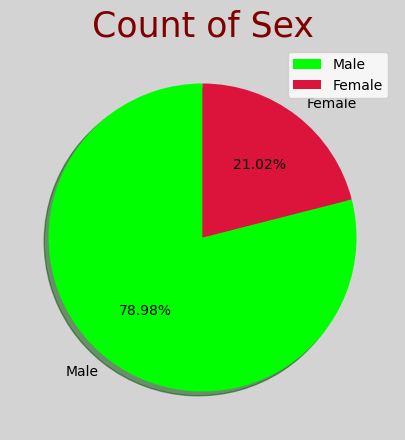

In [45]:
# Define labels and sizes for the 'Sex' category in the pie chart
sex_label = ['Male','Female']
sex_size = [725,193]
sex_explode = (0,0)
# Set up the figure for the pie chart
plt.figure(figsize=(8,5),facecolor='lightgray')
# Create a pie chart with the provided data
plt.pie( sex_size , explode=sex_explode , labels=sex_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90 , colors=['lime','crimson'])
plt.title("Count of Sex",fontsize=25,color='maroon')
plt.legend()

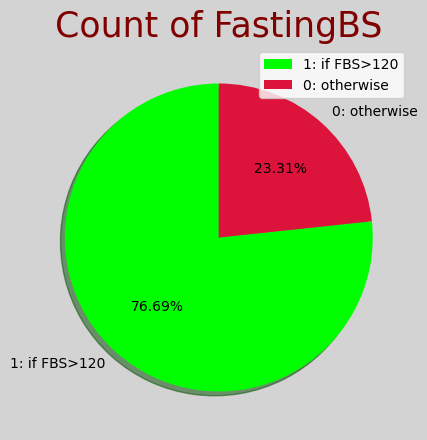

In [46]:
# Define labels and sizes for the 'FastingBS' category in the pie chart
FastingBS_label = ['1: if FBS>120','0: otherwise']
FastingBS_size = [704,214]
FastingBS_explode = (0,0)

# Set up the figure for the pie chart
plt.figure(figsize=(8,5),facecolor='lightgray')
# Create a pie chart with the provided data
plt.pie( FastingBS_size , explode=FastingBS_explode , labels=FastingBS_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90 , colors=['lime','crimson'])
plt.title("Count of FastingBS",fontsize=25,color='maroon')
plt.legend()

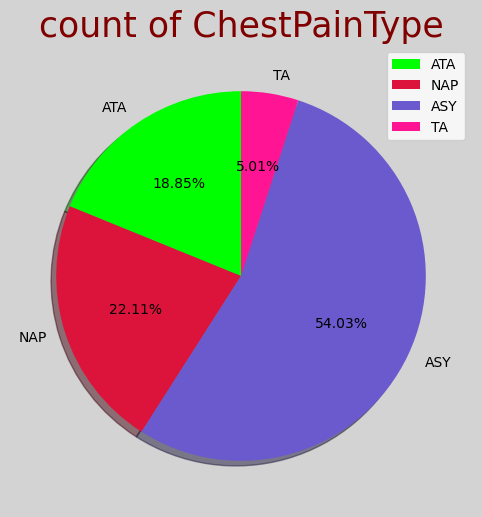

In [47]:
# Define labels and sizes for the 'ChestPainType' category in the pie chart
ChestPainType_label = ['ATA', 'NAP', 'ASY', 'TA']
ChestPainType_size = [173, 203, 496, 46]
ChestPainType_explode = (0, 0, 0, 0)
# Set up the figure for the pie chart
plt.figure(figsize=(8,6),facecolor='lightgray')
# Create a pie chart with the provided data
plt.pie( ChestPainType_size , explode=ChestPainType_explode , labels=ChestPainType_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors= ['lime','crimson', 'slateblue', 'deeppink'])
plt.title("count of ChestPainType",fontsize=25,color='maroon')
plt.legend()

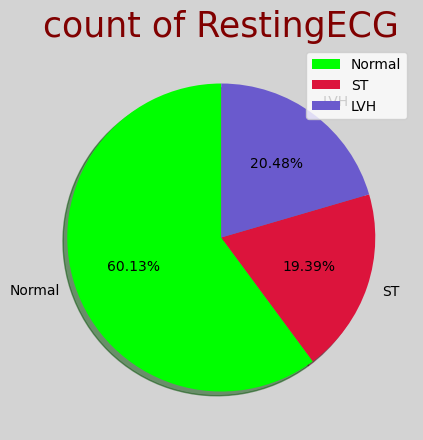

In [48]:
# Define labels and sizes for the 'RestingECG' category in the pie chart
RestingECG_label = ['Normal', 'ST', 'LVH']
RestingECG_size = [552, 178, 188]
RestingECG_explode = (0, 0, 0)
# Set up the figure for the pie chart
plt.figure(figsize=(8, 5),facecolor='lightgray')
# Create a pie chart with the provided data
plt.pie( RestingECG_size , explode=RestingECG_explode , labels=RestingECG_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['lime', 'crimson', 'slateblue'])
plt.title("count of RestingECG",fontsize=25,color='maroon')
plt.legend()

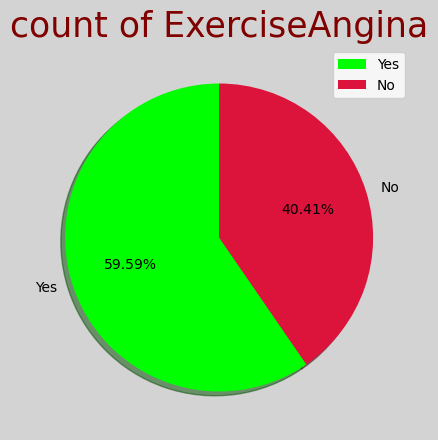

In [49]:
# Define labels and sizes for the 'ExerciseAngina' category in the pie chart
ExerciseAngina_label = ['Yes', 'No']
ExerciseAngina_size = [547, 371]
ExerciseAngina_explode = (0, 0)
# Set up the figure for the pie chart
plt.figure(figsize=(8, 5),facecolor='lightgray')
# Create a pie chart with the provided data
plt.pie( ExerciseAngina_size , explode=ExerciseAngina_explode , labels=ExerciseAngina_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['lime', 'crimson'])
plt.title("count of ExerciseAngina",fontsize=25,color='maroon')
plt.legend()

# Catplot

<Figure size 300x400 with 0 Axes>

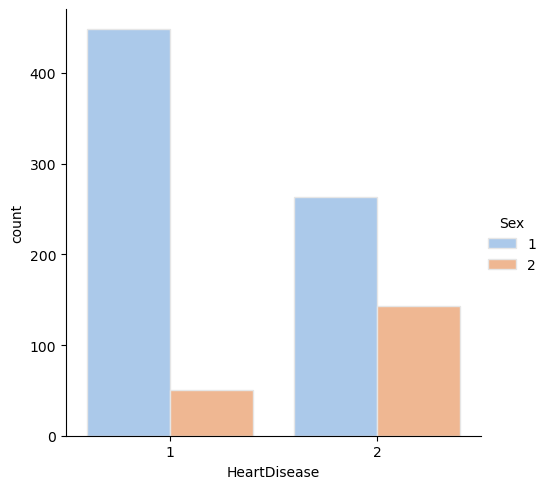

<Figure size 300x400 with 0 Axes>

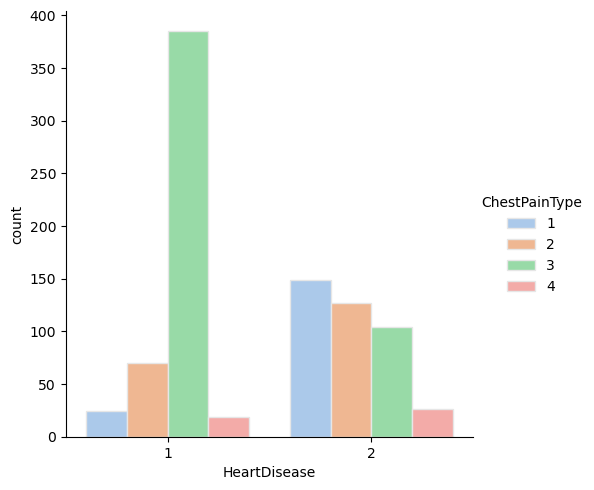

<Figure size 300x400 with 0 Axes>

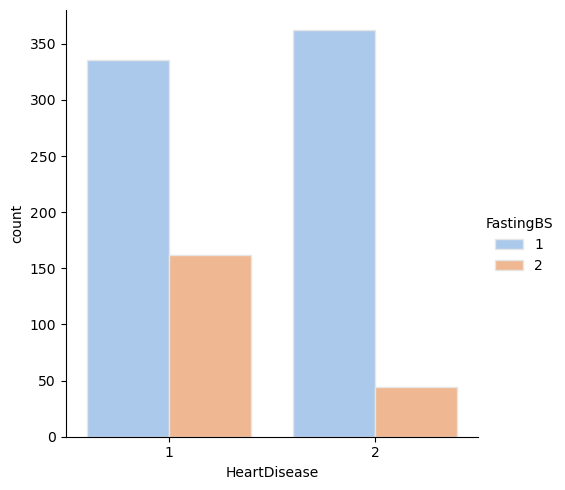

<Figure size 300x400 with 0 Axes>

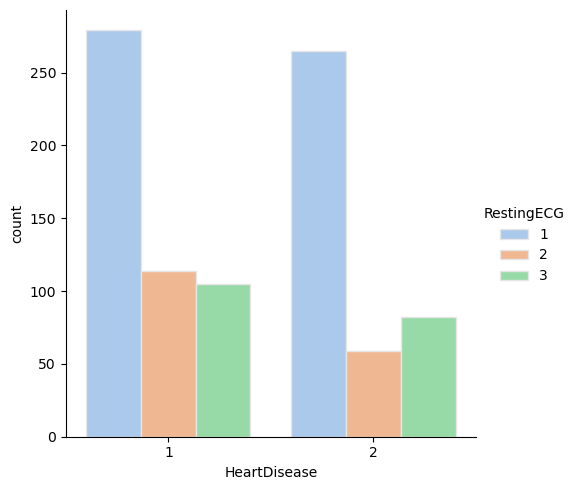

<Figure size 300x400 with 0 Axes>

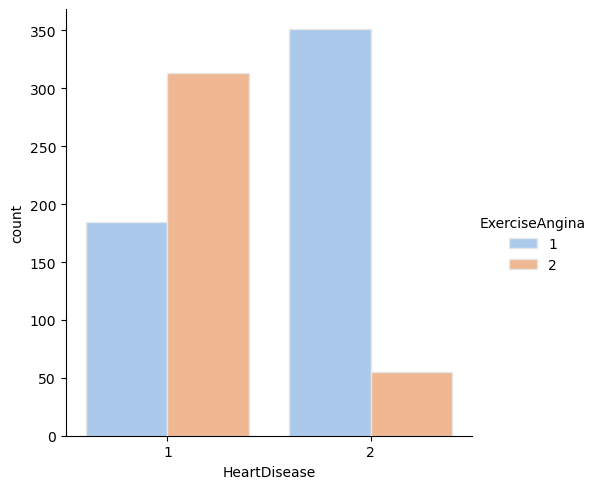

<Figure size 300x400 with 0 Axes>

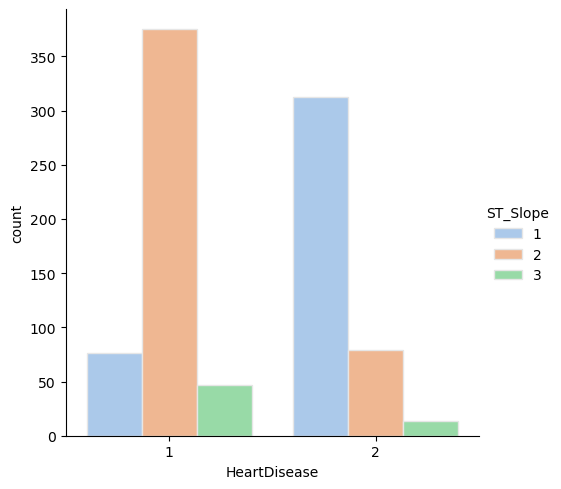

In [50]:
for i in range(0,7) :
    if i < 6 :
         # Set up a new figure for the count plot with specified dimensions
        plt.figure(figsize=(3,4))
         # Create a categorical count plot using seaborn
        # 'HeartDisease' is plotted on the x-axis, and the hue is determined by the category defined in df_cat_name[i]
        sns.catplot(x="HeartDisease", hue=df_cat_name[i], kind="count",palette="pastel", edgecolor=".9",data=df)
        plt.show()
    elif i==6 :
        pass

# Visualising numerical Data

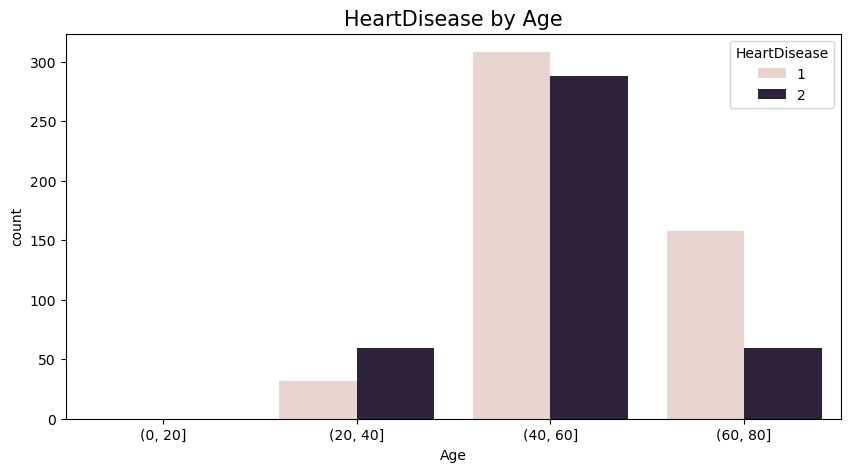

In [51]:
# Set up a new figure for the count plot with specified dimensions
plt.figure(figsize=(10,5))
# Define bins for categorizing ages into intervals
bins=[0, 20, 40, 60, 80]
# Create a count plot using seaborn
# The x-axis represents age categories defined by the bins, and the hue represents the presence of heart disease
sns.countplot(x=pd.cut(df.Age,bins=bins),hue=df.HeartDisease)
plt.title("HeartDisease by Age", fontsize=15)
plt.show()

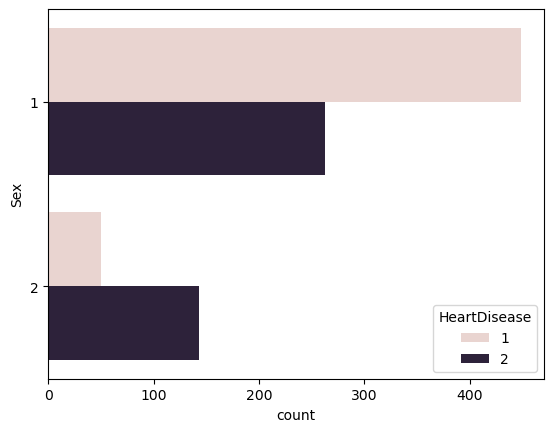

In [52]:
# Create a horizontal count plot using seaborn
# The y-axis represents the 'Sex' variable, and the hue distinguishes between those with and without heart disease
ax = sns.countplot(y="Sex", hue="HeartDisease", data=df)

# Box Plot

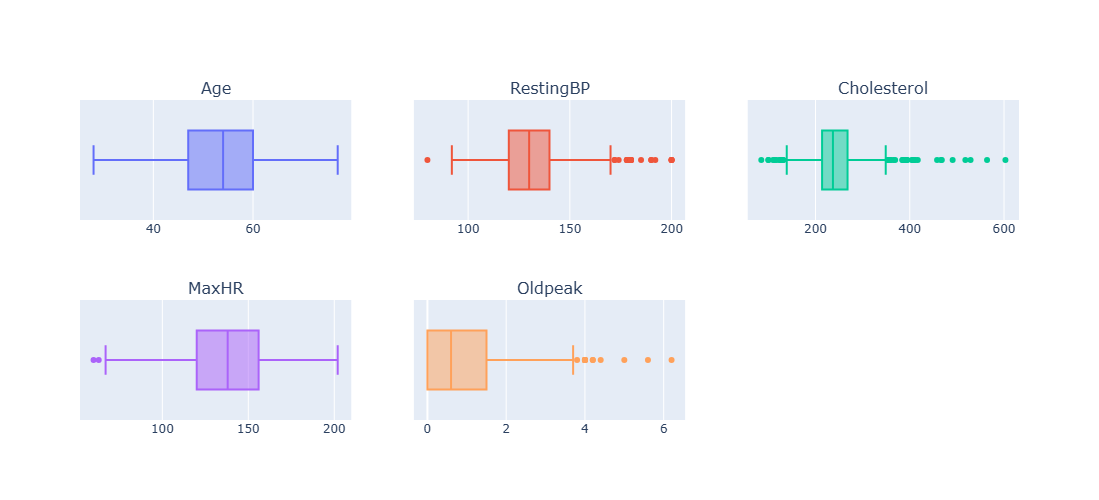

In [53]:
# Set up the subplots grid
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=3, 
                    # Set the subplot titles
                    subplot_titles=['Age', 'RestingBP', 'Cholesterol','MaxHR','Oldpeak'])
#create boxplot visualization of numeric columns
fig.add_trace(go.Box(x=df.Age, name='', showlegend=False), row=1, col=1)
fig.add_trace(go.Box(x=df.RestingBP, name='', showlegend=False), row=1, col=2)
fig.add_trace(go.Box(x=df.Cholesterol, name='', showlegend=False), row=1, col=3)
fig.add_trace(go.Box(x=df.MaxHR, name='', showlegend=False), row=2, col=1)
fig.add_trace(go.Box(x=df.Oldpeak, name='', showlegend=False), row=2, col=2)

#config size
fig.update_layout(height=500, width=1100)
#show visualizations
fig.show()

## Correlation

<Axes: >

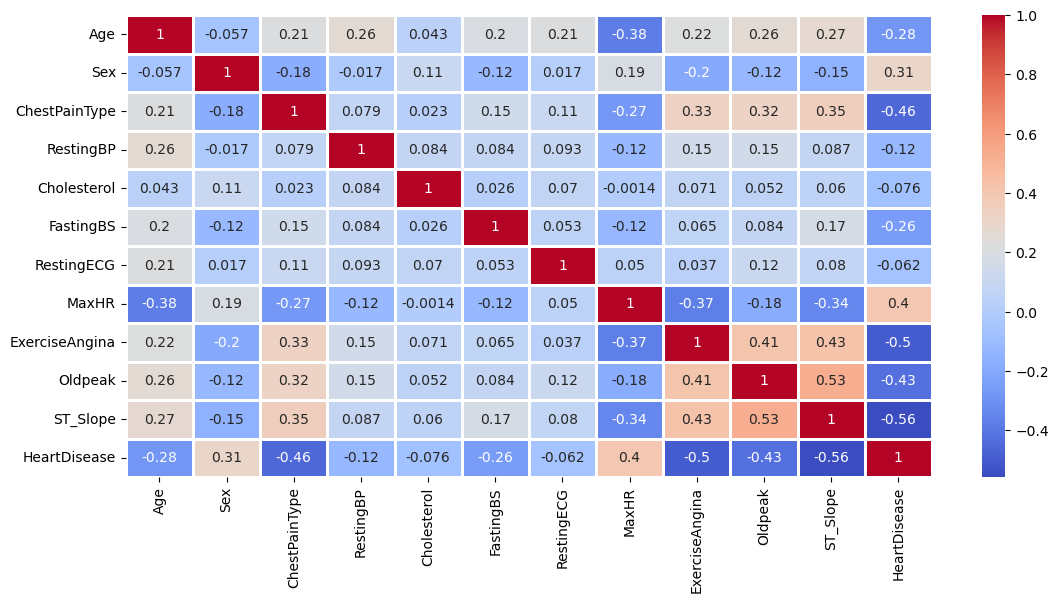

In [54]:
#Correlation between all features 
fig , ax = plt.subplots(figsize=(13,6))   
sns.heatmap(df.corr(), cmap="coolwarm", linecolor='white' , annot=True , linewidths=1 , ax=ax )

In [55]:
# Calculate the absolute correlation coefficients between all numerical columns and 'HeartDisease'
pd.DataFrame(abs(df.corr()['HeartDisease'])).T.round(2)

Age   Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
HeartDisease  0.28  0.31           0.46       0.12         0.08       0.26   

              RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  \
HeartDisease        0.06    0.4             0.5     0.43      0.56   

              HeartDisease  
HeartDisease           1.0

In [56]:
## Combining Data
df.agg(
    {
       "Age": ["min", "max", "median","mean", "skew", 'std'],
        "RestingBP": ["min", "max", "median", "mean","skew",'std'],
        "Cholesterol": ["min", "max", "median", "mean","skew",'std'],
        "Oldpeak": ["min", "max", "median", "mean","skew",'std'],
        "MaxHR": ["min", "max", "median", "mean","skew",'std']
    }
)

Age   RestingBP  Cholesterol   Oldpeak       MaxHR
min     28.000000   80.000000    85.000000  0.000000   60.000000
max     77.000000  200.000000   603.000000  6.200000  202.000000
median  54.000000  130.000000   237.000000  0.600000  138.000000
mean    53.528761  132.806416   243.384956  0.913606  136.969027
skew    -0.193384    0.605859     1.435895  1.140450   -0.136971
std      9.431648   17.952414    53.738632  1.047342   25.337263

# Data Train and Test

In [57]:
x = df.drop('HeartDisease', axis=1)
y = df.HeartDisease

In [58]:
from sklearn.model_selection import train_test_split

for i in range(20,31):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=21)

# Feature Scaling with Normalization method

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.fit_transform(x_test)

In [60]:
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [61]:
print("x train : \n")
print(x_train.head())
print("x test : \n")
print(x_test.head())

x train : 

        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  0.714286  0.0       0.000000   0.466667     0.167015        0.0   
1  0.571429  0.0       0.000000   0.333333     0.323591        0.0   
2  0.306122  1.0       0.000000   0.333333     0.342380        0.0   
3  0.224490  0.0       0.666667   0.250000     0.407098        0.0   
4  0.673469  0.0       0.666667   0.500000     0.254697        0.0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0         0.5  0.503597             0.0  0.032258       0.0  
1         0.0  0.762590             0.0  0.000000       1.0  
2         0.5  0.812950             0.0  0.000000       0.0  
3         0.0  0.625899             0.0  0.000000       0.5  
4         1.0  0.539568             1.0  0.306452       0.0  
x test : 

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0  0.375  0.0       0.666667   0.414634     0.072430        0.0         0.0   
1  0.450  0.0       0.6666

# Logistic Regresssion

In [62]:
#Metrics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
# Create and train a Logistic Regression model
LR_model = LogisticRegression(max_iter=7000)
LR_model.fit(x_train, y_train)

LogisticRegression(max_iter=7000)

In [65]:
#Predicting the test set result
df_logreg = pd.DataFrame()
penalty_param = ['l1', 'l2']
states_num = range(32,43)

for p in penalty_param :
    for i in range(20,31) :
        for  s in states_num :
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=s)
            logreg = LogisticRegression(solver='liblinear', max_iter=1000)
            logreg.fit(x_train, y_train)
            y_pred_logreg = logreg.predict(x_test)
            dict1 = {"Test Size": i, "Penalty":p, "Random State":s,
                     "Score" : logreg.score(x,y) , "Accuracy_score" : metrics.accuracy_score(y_test , y_pred_logreg )}
            df_logreg = pd.concat([df_logreg, pd.DataFrame([dict1])], ignore_index=True)


df_logreg.round(2)

Test Size Penalty  Random State  Score  Accuracy_score
0           20      l1            32   0.85            0.80
1           20      l1            33   0.85            0.80
2           20      l1            34   0.85            0.65
3           20      l1            35   0.85            0.95
4           20      l1            36   0.85            0.90
5           20      l1            37   0.86            0.90
6           20      l1            38   0.85            0.95
7           20      l1            39   0.85            0.85
8           20      l1            40   0.85            0.85
9           20      l1            41   0.85            1.00
10          20      l1            42   0.85            0.80
11          21      l1            32   0.85            0.76
12          21      l1            33   0.85            0.81
13          21      l1            34   0.85            0.67
14          21      l1            35   0.85            0.95
15          21      l1            36   0.85            0.90
16          21      l1            37   0.86            0.90
17          21      l1            38   0.85            0.95
18          21      l1            39   0.85            0.81
19          21      l1            40   0.85            0.86
20          21      l1            41   0.85            1.00
21          21      l1            42   0.85            0.81
22          22      l1            32   0.85            0.77
23          22      l1            33   0.85            0.82
24          22      l1            34   0.85            0.68
25          22      l1            35   0.85            0.91
26          22      l1            36   0.85            0.91
27          22      l1            37   0.86            0.91
28          22      l1            38   0.85            0.95
29          22      l1            39   0.85            0.82
30          22      l1            40   0.85            0.86
31          22      l1            41   0.85            1.00
32          22      l1            42   0.85            0.82
33          23      l1            32   0.85            0.74
34          23      l1            33   0.85            0.83
35          23      l1            34   0.85            0.70
36          23      l1            35   0.85            0.87
37          23      l1            36   0.85            0.87
38          23      l1            37   0.86            0.91
39          23      l1            38   0.85            0.96
40          23      l1            39   0.85            0.83
41          23      l1            40   0.85            0.83
42          23      l1            41   0.85            1.00
43          23      l1            42   0.86            0.78
44          24      l1            32   0.85            0.75
45          24      l1            33   0.85            0.83
46          24      l1            34   0.85            0.71
47          24      l1            35   0.85            0.88
48          24      l1            36   0.85            0.88
49          24      l1            37   0.85            0.92
50          24      l1            38   0.85            0.96
51          24      l1            39   0.85            0.83
52          24      l1            40   0.85            0.83
53          24      l1            41   0.85            1.00
54          24      l1            42   0.85            0.75
55          25      l1            32   0.85            0.72
56          25      l1            33   0.85            0.84
57          25      l1            34   0.85            0.72
58          25      l1            35   0.85            0.88
59          25      l1            36   0.85            0.88
60          25      l1            37   0.85            0.92
61          25      l1            38   0.86            0.92
62          25      l1            39   0.85            0.80
63          25      l1            40   0.85            0.84
64          25      l1            41   0.85            1.00
65          25      l1            42   0.85  

In [66]:
#Removing the Accuracy_score which lower than 90 score , then sorting value base on Accuracy_score column
indx_names = df_logreg[df_logreg['Accuracy_score'] < 0.90].index
df_logreg.drop(indx_names, inplace = True)
df_logreg = df_logreg.sort_values(by='Accuracy_score', ascending=False)
df_logreg

Test Size Penalty  Random State     Score  Accuracy_score
97          28      l1            41  0.851770        1.000000
185         25      l2            41  0.851770        1.000000
42          23      l1            41  0.852876        1.000000
64          25      l1            41  0.851770        1.000000
163         23      l2            41  0.852876        1.000000
31          22      l1            41  0.851770        1.000000
141         21      l2            41  0.852876        1.000000
75          26      l1            41  0.851770        1.000000
174         24      l2            41  0.852876        1.000000
20          21      l1            41  0.852876        1.000000
53          24      l1            41  0.852876        1.000000
130         20      l2            41  0.851770        1.000000
196         26      l2            41  0.851770        1.000000
207         27      l2            41  0.851770        1.000000
86          27      l1            41  0.851770        1.000000
9           20      l1            41  0.851770        1.000000
218         28      l2            41  0.851770        1.000000
152         22      l2            41  0.851770        1.000000
119         30      l1            41  0.851770        0.966667
240         30      l2            41  0.851770        0.966667
108         29      l1            41  0.851770        0.965517
229         29      l2            41  0.851770        0.965517
50          24      l1            38  0.852876        0.958333
171         24      l2            38  0.852876        0.958333
160         23      l2            38  0.851770        0.956522
39          23      l1            38  0.851770        0.956522
149         22      l2            38  0.852876        0.954545
28          22      l1            38  0.852876        0.954545
138         21      l2            38  0.852876        0.952381
135         21      l2            35  0.852876        0.952381
17          21      l1            38  0.852876        0.952381
14          21      l1            35  0.852876        0.952381
127         20      l2            38  0.852876        0.950000
3           20      l1            35  0.852876        0.950000
124         20      l2            35  0.852876        0.950000
6           20      l1            38  0.852876        0.950000
115         30      l1            37  0.855088        0.933333
116         30      l1            38  0.855088        0.933333
237         30      l2            38  0.855088        0.933333
236         30      l2            37  0.855088        0.933333
104         29      l1            37  0.853982        0.931034
226         29      l2            38  0.855088        0.931034
225         29      l2            37  0.853982        0.931034
105         29      l1            38  0.855088        0.931034
94          28      l1            38  0.855088        0.928571
93          28      l1            37  0.855088        0.928571
215         28      l2            38  0.855088        0.928571
214         28      l2            37  0.855088        0.928571
82          27      l1            37  0.853982        0.925926
204         27      l2            38  0.855088        0.925926
203         27      l2            37  0.853982        0.925926
83          27      l1            38  0.855088        0.925926
72          26      l1            38  0.855088        0.923077
71          26      l1            37  0.853982        0.923077
193         26      l2            38  0.855088        0.923077
192         26      l2            37  0.853982        0.923077
181         25      l2            37  0.853982        0.920000
182         25      l2            38  0.855088        0.920000
60          25      l1            37  0.853982        0.920000
61          25      l1            38  0.855088        0.920000
170         24      l2            37  0.853982        0.916667
49          24      l1            37  0.853982        0.916667
38          23      l1            37

In [67]:
#We choosing this with higher score 
df_logreg.loc[[214]]

Test Size Penalty  Random State     Score  Accuracy_score
214         28      l2            37  0.855088        0.928571

In [68]:
#you can see the green color for accuracy_score and score which sample are lower than 96% 
def highlight_greaterthan(x):
    if x.Accuracy_score < 0.96 :
        return ['background-color: seagreen']*5
    else:
        return ['background-color: dimgray']*5
df_logreg.style.apply(highlight_greaterthan, axis=1)

In [69]:
#I picking this row 
df_logreg.loc[[82]]

Test Size Penalty  Random State     Score  Accuracy_score
82         27      l1            37  0.853982        0.925926

In [70]:
#Selecting above value and putting those for get some new results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=26, random_state=34)
classifier_1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
classifier_1.fit(x_train, y_train)
y_pred_1 = classifier_1.predict(x_test)

log_train = round(classifier_1.score(x_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_1, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_1, y_test) * 100, 2)

print("Training Accuracy    :",log_train,"%")
print("Model Accuracy Score :",log_accuracy,"%\n")
print("--------------------------------------------------------\n")
print("Classification_Report: \n",classification_report(y_test,y_pred_1))

Training Accuracy    : 85.88 %
Model Accuracy Score : 76.92 %

--------------------------------------------------------

Classification_Report: 
               precision    recall  f1-score   support

           1       0.77      0.77      0.77        13
           2       0.77      0.77      0.77        13

    accuracy                           0.77        26
   macro avg       0.77      0.77      0.77        26
weighted avg       0.77      0.77      0.77        26



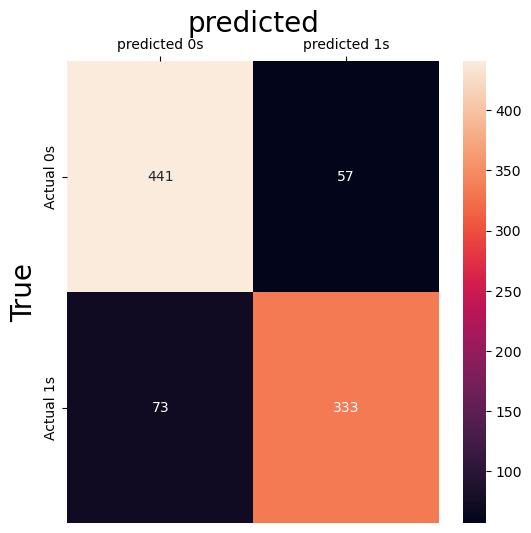

In [71]:
#another confusion matrix with sns.heatmap
c_matrix = confusion_matrix(y,classifier_1.predict(x))

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(c_matrix , annot=True , ax=ax , fmt='d')
ax.set_xlabel("predicted" , fontsize=20)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticklabels(['predicted 0s', 'predicted 1s'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'], fontsize = 10)

plt.show()

In [72]:
print('Confusion matrix:\n\n', c_matrix)
print("-----------------------------")
print('\nTrue Positives(TP) = ', c_matrix[0,0])
print("-----------------------------")
print('\nTrue Negatives(TN) = ', c_matrix[1,1])
print("-----------------------------")
print('\nFalse Positives(FP) = ', c_matrix[0,1])
print("-----------------------------")
print('\nFalse Negatives(FN) = ', c_matrix[1,0])

Confusion matrix:

 [[441  57]
 [ 73 333]]
-----------------------------

True Positives(TP) =  441
-----------------------------

True Negatives(TN) =  333
-----------------------------

False Positives(FP) =  57
-----------------------------

False Negatives(FN) =  73


# Modeling

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=26, random_state=34)

# Random Forest

In [74]:
# Create and train a Random Forest Classifier model
RFC_model = RandomForestClassifier()
RFC_model.fit(x_train, y_train)

RandomForestClassifier()

In [75]:
# Make predictions on the test set
RFC_y_pred =RFC_model.predict(x_test)

In [76]:
RFC_train_preds = RFC_model.predict(x_train)
RFC_train_preds

array([1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2,

In [77]:
RFC_test_preds = RFC_model.predict(x_test)
RFC_test_preds

array([2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2], dtype=int64)

In [78]:
RFC_train_preds_score = RFC_model.score(x_train,y_train)
RFC_train_preds_score

1.0

In [79]:
RFC_test_preds_score = RFC_model.score(x_test,y_test)
RFC_test_preds_score

0.6923076923076923

In [80]:
# Compute the confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, RFC_y_pred)

In [81]:
# Create a DataFrame for the confusion matrix (optional)
confusion_df_rfc = pd.DataFrame(conf_matrix_rfc, index=RFC_model.classes_, columns=RFC_model.classes_)


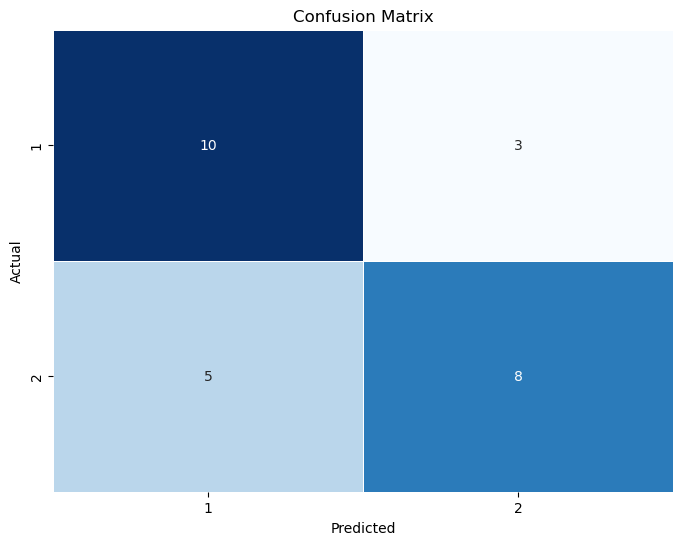

In [82]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_rfc, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [83]:
# Evaluate the model
accuracy_rfc = accuracy_score(y_test, RFC_y_pred)
classification_rep_rfc = classification_report(y_test, RFC_y_pred)
confusion_mat_rfc = confusion_matrix(y_test, RFC_y_pred)


In [84]:
# Print the results
print(f"Accuracy: {accuracy_rfc:.2f}")
print("Classification Report:\n", classification_rep_rfc)
print("Confusion Matrix:\n", confusion_mat_rfc)

Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.77      0.71        13
           2       0.73      0.62      0.67        13

    accuracy                           0.69        26
   macro avg       0.70      0.69      0.69        26
weighted avg       0.70      0.69      0.69        26

Confusion Matrix:
 [[10  3]
 [ 5  8]]
